In [ ]:
import numpy as np
import statistics as st
import pandas as pd
import math
import matplotlib.pyplot as plt
import scipy.stats

In [ ]:
T = 10
n = 100
h = 0.05
k = int((T - 0) / h)

def _m(t):
  return (1 + math.exp(-t / 2))

def K(tau):
  return (3 / (3 + 20 * tau**2))

k

200

Вектор математических ожиданий m и ковариационная матрица sigma

In [ ]:
m = np.zeros(k+1)
sigma = [[0] * (k+1) for i in range(k+1)]

for i in range(k+1):
  m[i] = _m(i * h)

for i in range(k+1):
  for j in range(k+1):
    sigma[i][j] = K(math.fabs(i - j) * h)

m_visual = pd.DataFrame(m)
m_visual

,0
0,2.000000
1,1.975310
2,1.951229
3,1.927743
4,1.904837
...,...
196,1.007447
197,1.007263
198,1.007083
199,1.006909


In [ ]:
sigma_visual = pd.DataFrame(sigma)
sigma_visual

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,1.000000,0.983607,0.937500,0.869565,0.789474,0.705882,0.625000,0.550459,0.483871,0.425532,...,0.001642,0.001625,0.001608,0.001592,0.001575,0.001559,0.001544,0.001528,0.001513,0.001498
1,0.983607,1.000000,0.983607,0.937500,0.869565,0.789474,0.705882,0.625000,0.550459,0.483871,...,0.001659,0.001642,0.001625,0.001608,0.001592,0.001575,0.001559,0.001544,0.001528,0.001513
2,0.937500,0.983607,1.000000,0.983607,0.937500,0.869565,0.789474,0.705882,0.625000,0.550459,...,0.001677,0.001659,0.001642,0.001625,0.001608,0.001592,0.001575,0.001559,0.001544,0.001528
3,0.869565,0.937500,0.983607,1.000000,0.983607,0.937500,0.869565,0.789474,0.705882,0.625000,...,0.001695,0.001677,0.001659,0.001642,0.001625,0.001608,0.001592,0.001575,0.001559,0.001544
4,0.789474,0.869565,0.937500,0.983607,1.000000,0.983607,0.937500,0.869565,0.789474,0.705882,...,0.001713,0.001695,0.001677,0.001659,0.001642,0.001625,0.001608,0.001592,0.001575,0.001559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.001559,0.001575,0.001592,0.001608,0.001625,0.001642,0.001659,0.001677,0.001695,0.001713,...,0.705882,0.789474,0.869565,0.937500,0.983607,1.000000,0.983607,0.937500,0.869565,0.789474
197,0.001544,0.001559,0.001575,0.001592,0.001608,0.001625,0.001642,0.001659,0.001677,0.001695,...,0.625000,0.705882,0.789474,0.869565,0.937500,0.983607,1.000000,0.983607,0.937500,0.869565
198,0.001528,0.001544,0.001559,0.001575,0.001592,0.001608,0.001625,0.001642,0.001659,0.001677,...,0.550459,0.625000,0.705882,0.789474,0.869565,0.937500,0.983607,1.000000,0.983607,0.937500
199,0.001513,0.001528,0.001544,0.001559,0.001575,0.001592,0.001608,0.001625,0.001642,0.001659,...,0.483871,0.550459,0.625000,0.705882,0.789474,0.869565,0.937500,0.983607,1.000000,0.983607


Разложение Холецкого для матрицы sigma

In [ ]:
L = np.linalg.cholesky(sigma)
L_visual = pd.DataFrame(L)
L_visual

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.983607,0.180328,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.937500,0.340909,0.069819,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.869565,0.455781,0.186330,0.037439,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.789474,0.515914,0.307774,0.123312,0.025164,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.001559,0.000231,0.000732,0.000284,0.000575,0.000325,0.000510,0.000357,0.000480,0.000383,...,0.350523,0.307736,0.231314,0.137148,0.055738,0.011342,0.000000,0.000000,0.000000,0.000000
197,0.001544,0.000228,0.000725,0.000281,0.000569,0.000321,0.000505,0.000353,0.000474,0.000379,...,0.360359,0.350523,0.307736,0.231314,0.137148,0.055738,0.011342,0.000000,0.000000,0.000000
198,0.001528,0.000225,0.000717,0.000278,0.000563,0.000318,0.000499,0.000349,0.000469,0.000374,...,0.346375,0.360359,0.350523,0.307736,0.231314,0.137148,0.055738,0.011342,0.000000,0.000000
199,0.001513,0.000222,0.000710,0.000274,0.000557,0.000314,0.000494,0.000345,0.000464,0.000370,...,0.318784,0.346375,0.360359,0.350523,0.307736,0.231314,0.137148,0.055738,0.011342,0.000000


Невязка

In [ ]:
mtx = L.dot(np.transpose(L)) - sigma
max = mtx[0][0]
for i in range(k+1):
  for j in range(k+1):
    if mtx[i][j] > max:
      max = mtx[i][j]
print("%.50f" % max)

0.00000000000000044408920985006261616945266723632812


Матрица, строки которой - это траектории

In [ ]:
ksi_mtx = [[0] * (k+1) for i in range(n)]
epsilon = [0 for i in range(k+1)]
ksi = np.zeros(k+1)

for i in range(n):
  for j in range(k+1):
    epsilon = np.random.normal(0, 1, k+1)
    eta = np.dot(L, epsilon)
    ksi = eta + m
    ksi_mtx[i] = ksi

ksi_mtx_visual = pd.DataFrame(ksi_mtx)
ksi_mtx_visual


,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,3.447916,3.414564,3.333143,3.225718,3.148980,3.117037,3.057223,2.886128,2.612062,2.305904,...,2.037356,2.192768,2.207751,2.131948,2.022119,1.864523,1.601777,1.251924,0.920734,0.673539
1,1.710527,1.888058,2.008687,2.069778,2.120654,2.210736,2.338218,2.470390,2.585462,2.670630,...,1.647299,1.687051,1.704927,1.716923,1.709594,1.650390,1.538614,1.401385,1.252914,1.096541
2,1.769286,1.621770,1.407472,1.227437,1.158631,1.202612,1.295057,1.342305,1.288295,1.163823,...,0.068497,0.260928,0.560655,0.889091,1.176142,1.383825,1.505391,1.567210,1.615319,1.680910
3,2.585450,2.639510,2.644411,2.593829,2.499956,2.372168,2.188927,1.933915,1.640282,1.373232,...,2.036462,1.938464,1.778698,1.541698,1.284353,1.083416,0.990243,1.022520,1.164559,1.381499
4,1.847408,1.584502,1.350262,1.167239,1.059877,1.058403,1.181673,1.423243,1.754184,2.116770,...,2.292101,2.252161,2.173690,2.004063,1.708832,1.314441,0.880533,0.492978,0.239231,0.135581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.774016,2.669859,2.622833,2.606357,2.590154,2.581282,2.604568,2.651072,2.671834,2.623333,...,-0.284472,-0.133235,-0.047341,-0.070785,-0.166567,-0.226191,-0.158793,0.035211,0.295740,0.561322
96,2.764432,2.844991,2.829281,2.697965,2.500217,2.299435,2.106660,1.917415,1.777229,1.746609,...,0.925958,1.137687,1.360923,1.567706,1.733307,1.827490,1.824312,1.721588,1.553431,1.373916
97,2.296197,1.789680,1.282511,0.854872,0.584252,0.514950,0.640350,0.888633,1.158017,1.349303,...,0.082545,-0.097356,-0.278279,-0.496399,-0.694788,-0.771063,-0.672296,-0.443024,-0.186234,0.009810
98,1.915161,1.925101,2.005112,2.106125,2.162645,2.150551,2.113501,2.094084,2.085393,2.059148,...,2.672027,2.582702,2.413749,2.168984,1.873687,1.578006,1.347988,1.240953,1.246606,1.264937


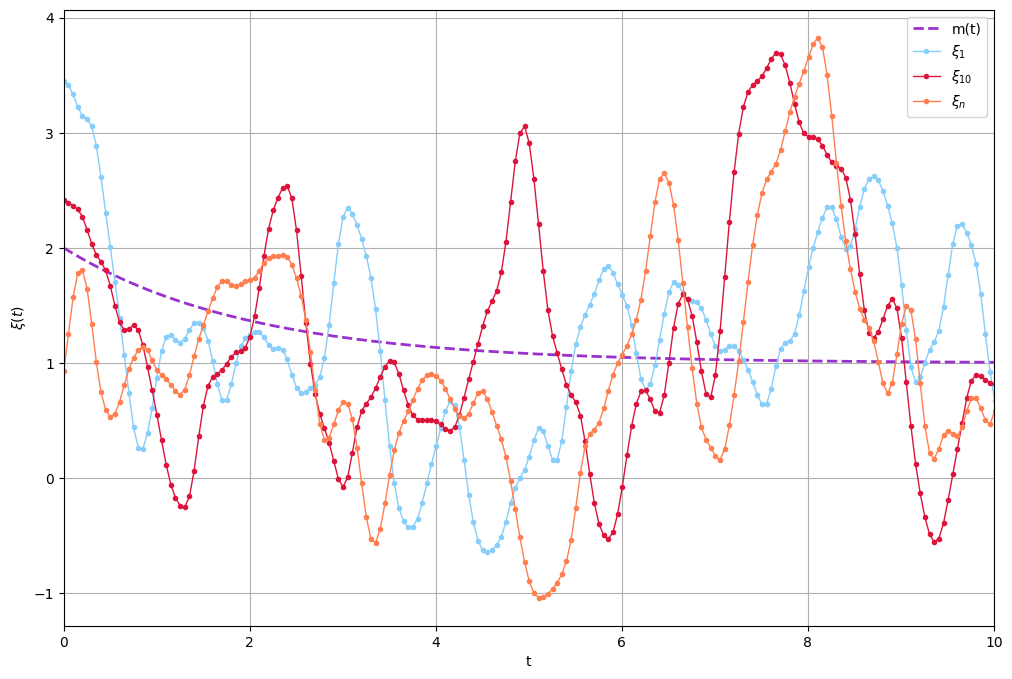

In [ ]:
plt.figure(figsize=(12, 8))
t = np.linspace(0, 10.01, 201)
func = lambda t: 1 + math.e**(-t / 2)
plt.xlim([0, 10])
plt.plot(t, func(t), linestyle='--', linewidth=2, color='darkorchid', label="m(t)")
plt.plot(t, ksi_mtx[0], '-o', markersize = 3, linewidth=1, color='lightskyblue', label="$\u03BE_1$")
plt.plot(t, ksi_mtx[9], '-o', markersize = 3, linewidth=1, color='crimson', label="$\u03BE_{10}$")
plt.plot(t, ksi_mtx[n-1], '-o', markersize = 3, linewidth=1, color='coral', label="$\u03BE_n$")
plt.xlabel('t')
plt.ylabel('$\u03BE(t)$')
plt.grid()
plt.legend()
plt.show()

Проверка качества моделирования траекторий

In [ ]:
s_n = [0 for i in range(n)]
s_1 = [0 for i in range(n)]
s_2 = [0 for i in range(n)]
s_5 = [0 for i in range(n)]
s_10 = [0 for i in range(n)]

for i in range(n):
  s_n[i] = ksi_mtx[i][n-1]
  s_1[i] = ksi_mtx[i][0]
  s_2[i] = ksi_mtx[i][1]
  s_5[i] = ksi_mtx[i][4]
  s_10[i] = ksi_mtx[i][9]

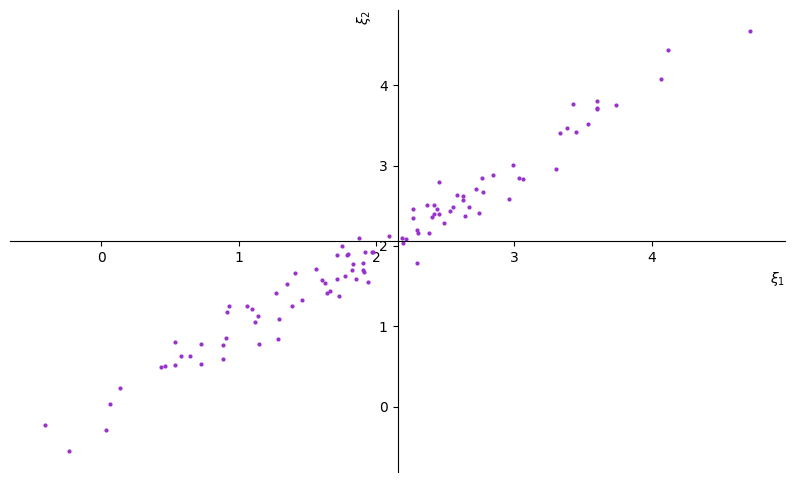

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(s_1, s_2, 'o', markersize = 2, color='darkorchid')
plt.xlabel('$\u03BE_1$', loc='right')
plt.ylabel('$\u03BE_2$', loc='top')
ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

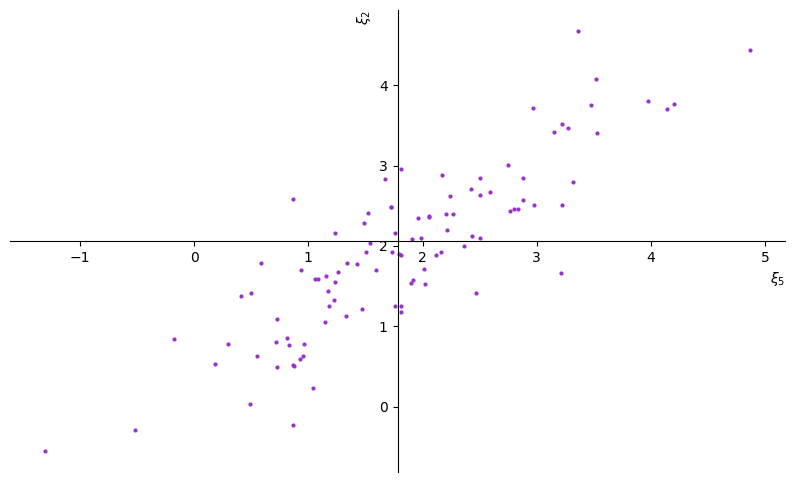

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(s_5, s_2, 'o', markersize = 2, color='darkorchid')
plt.xlabel('$\u03BE_5$', loc='right')
plt.ylabel('$\u03BE_2$', loc='top')
ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

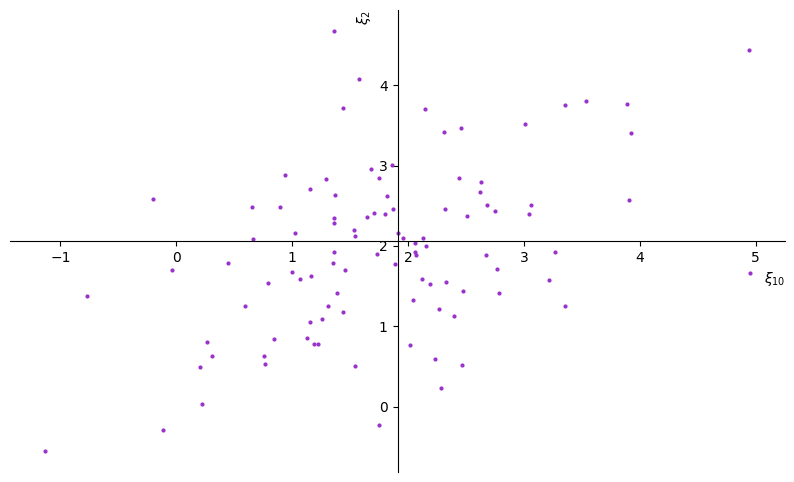

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(s_10, s_2, 'o', markersize = 2, color='darkorchid')
plt.xlabel('$\u03BE_{10}$', loc='right')
plt.ylabel('$\u03BE_2$', loc='top')
ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

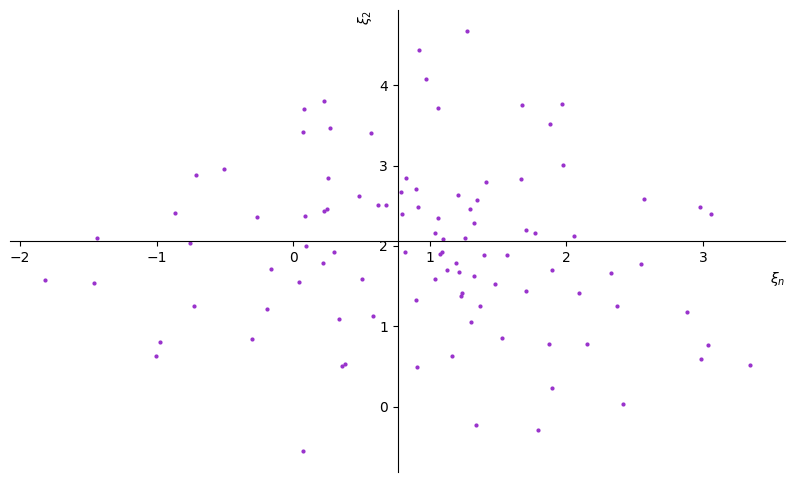

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(s_n, s_2, 'o', markersize = 2, color='darkorchid')
plt.xlabel('$\u03BE_n$', loc='right')
plt.ylabel('$\u03BE_2$', loc='top')
ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

Вычислим теоретические и выборочные коэффициенты корреляции для построенных сечений процесса по формулам:

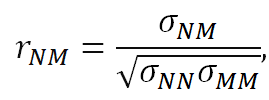

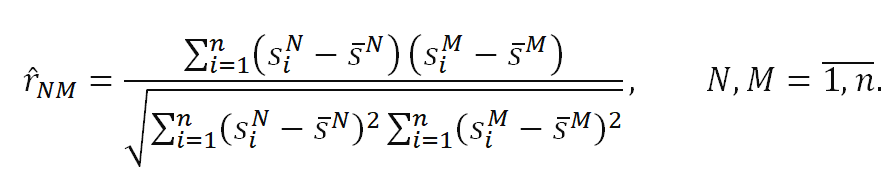

Теоретические коэффициенты корреляции

In [ ]:
r_1_2 = sigma[1][2] / (sigma[1][1] * sigma[2][2])**(1/2)
r_5_2 = sigma[5][2] / (sigma[5][5] * sigma[2][2])**(1/2)
r_10_2 = sigma[10][2] / (sigma[10][10] * sigma[2][2])**(1/2)
r_n_2 = sigma[n-1][2] / (sigma[n-1][n-1] * sigma[2][2])**(1/2)
(r_1_2, r_5_2, r_10_2, r_n_2)

(0.9836065573770493,
 0.8695652173913043,
 0.4838709677419354,
 0.0063364663639243835)

Выборочные коэффициенты корреляции

In [ ]:
# def sample_coef(s_i, s_j):
#   sum1 = 0
#   sum2 = 0
#   sum3 = 0
#   sum4 = 0
#   sum5 = 0
#   for i in range(n):
#     sum1 += s_i[i] * s_j[i]
#     sum2 += s_i[i]
#     sum3 += s_j[i]
#     sum4 += (s_i[i])**2
#     sum5 += (s_j[i])**2
#   coef = (n * sum1 - sum2 * sum3) / ((n * sum4 - sum2**2)**(1/2) * (n * sum5 - sum3**2)**(1/2))
#   return coef

# sample_r_1_2 = sample_coef(s_1, s_2)
# sample_r_5_2 = sample_coef(s_5, s_2)
# sample_r_10_2 = sample_coef(s_10, s_2)
# sample_r_n_2 = sample_coef(s_n, s_2)

# (sample_r_1_2, sample_r_5_2, sample_r_10_2, sample_r_n_2)

(np.corrcoef(s_1, s_2)[0,1], np.corrcoef(s_5, s_2)[0,1], np.corrcoef(s_10, s_2)[0,1], np.corrcoef(s_n, s_2)[0,1])

(0.9840251346041151,
 0.8618079982036123,
 0.4401314178449016,
 -0.09543866134069365)

Построим 95% доверительные интервалы на основе выборочных коэффициентов корреляции по формулам:

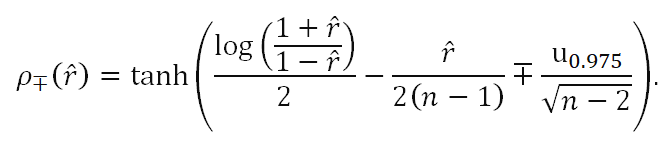

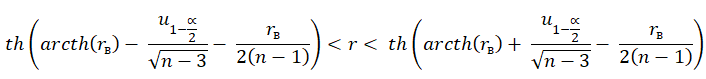

In [ ]:
def left_i_j(sample_coef):
  alpha = 0.05
  return math.tanh(math.atanh(sample_coef) - scipy.stats.norm(0, 1).ppf(1 - alpha/2) / (n - 3)**(1/2) - sample_coef / (2 * (n -1)))

def right_i_j(sample_coef):
  alpha = 0.05
  return math.tanh(math.atanh(sample_coef) + scipy.stats.norm(0, 1).ppf(1 - alpha/2) / (n - 3)**(1/2) - sample_coef / (2 * (n -1)))

left_1_2 = left_i_j(np.corrcoef(s_1, s_2)[0,1])
left_5_2 = left_i_j(np.corrcoef(s_5, s_2)[0,1])
left_10_2 = left_i_j(np.corrcoef(s_10, s_2)[0,1])
left_n_2 = left_i_j(np.corrcoef(s_n, s_2)[0,1])

right_1_2 = right_i_j(np.corrcoef(s_1, s_2)[0,1])
right_5_2 = right_i_j(np.corrcoef(s_5, s_2)[0,1])
right_10_2 = right_i_j(np.corrcoef(s_10, s_2)[0,1])
right_n_2 = right_i_j(np.corrcoef(s_n, s_2)[0,1])

('left_1_2: ', left_1_2, 'right_1_2: ', right_1_2, 'left_5_2: ', left_5_2, 'right_5_2: ', right_5_2, 'left_10_2: ', left_10_2, 'right_10_2: ', right_10_2, 'left_n_2: ', left_n_2, 'right_n_2: ', right_n_2,)

('left_1_2: ',
 0.9760743961505438,
 'right_1_2: ',
 0.9891352872324759,
 'left_5_2: ',
 0.7994090431640681,
 'right_5_2: ',
 0.9042372060230225,
 'left_10_2: ',
 0.26471012446386255,
 'right_10_2: ',
 0.5844369966163651,
 'left_n_2: ',
 -0.2860438263013709,
 'right_n_2: ',
 0.10338545338364642)

In [ ]:
max1 = np.max(s_1)
min1 = np.min(s_1)
omega1 = max1 - min1
l1 = int(1 + 3.322 * math.log10(n))
h1 = omega1 / l1
count1, int1 = np.histogram(s_1, l1) #количество попаданий и интервалы группировки

max2 = np.max(s_2)
min2 = np.min(s_2)
omega2 = max2 - min2
l2 = int(1 + 3.322 * math.log10(n))
h2 = omega2 / l2
count2, int2 = np.histogram(s_2, l2)

max5 = np.max(s_5)
min5 = np.min(s_5)
omega5 = max5 - min5
l5 = int(1 + 3.322 * math.log10(n))
h5 = omega5 / l5
count5, int5 = np.histogram(s_5, l5)

max10 = np.max(s_10)
min10 = np.min(s_10)
omega10 = max10 - min10
l10 = int(1 + 3.322 * math.log10(n))
h10 = omega10 / l10
count10, int10 = np.histogram(s_10, l10) 

maxn = np.max(s_n)
minn = np.min(s_n)
omegan = maxn - minn
ln = int(1 + 3.322 * math.log10(n))
hn = omegan / ln

countn, intn = np.histogram(s_n, ln) 

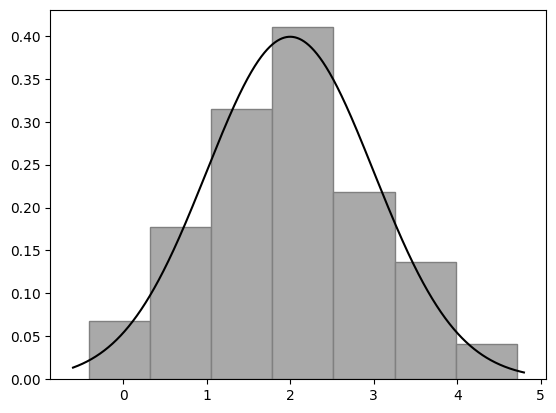

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(s_1, bins=l1, weights=np.ones_like(s_1)/(n * h1), edgecolor='grey', color='darkgrey')
x = np.arange(-0.6, 4.8, 0.001)
ax.plot(x, scipy.stats.norm.pdf(x, m[0], sigma[0][0]), color='black')

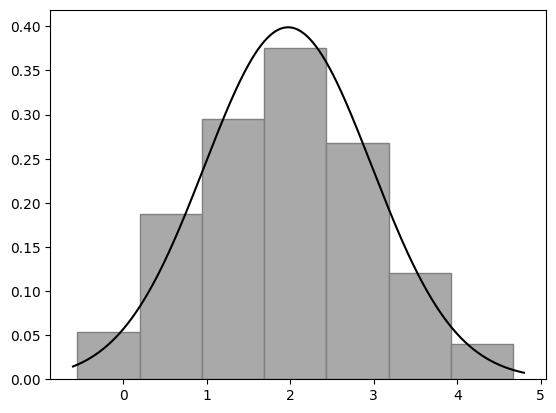

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(s_2, bins=l2, weights=np.ones_like(s_2)/(n * h2), edgecolor='grey', color='darkgrey')
x = np.arange(-0.6, 4.8, 0.001)
ax.plot(x, scipy.stats.norm.pdf(x, m[1], sigma[1][1]), color='black')

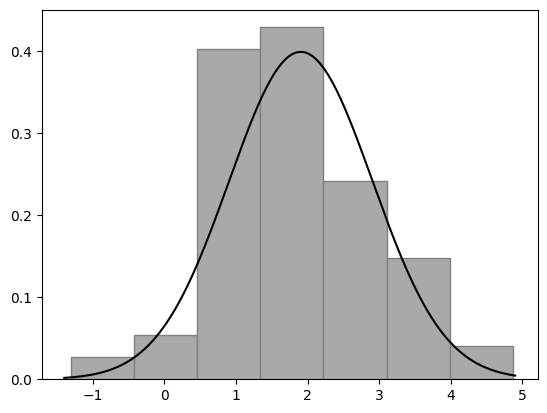

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(s_5, bins=l5, weights=np.ones_like(s_5)/(n * h2), edgecolor='grey', color='darkgrey')
x = np.arange(-1.4, 4.9, 0.001)
ax.plot(x, scipy.stats.norm.pdf(x, m[4], sigma[4][4]), color='black')

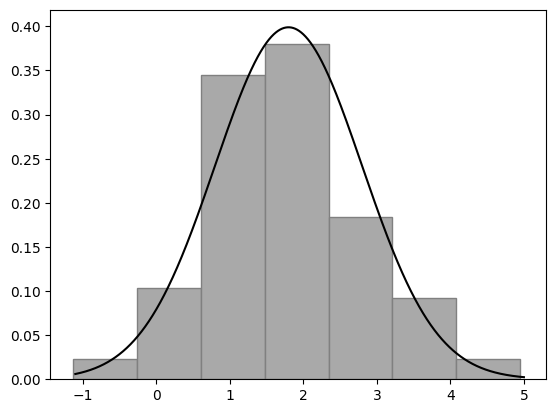

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(s_10, bins=l10, weights=np.ones_like(s_10)/(n * h10), edgecolor='grey', color='darkgrey')
x = np.arange(-1.1, 5, 0.001)
ax.plot(x, scipy.stats.norm.pdf(x, m[9], sigma[9][9]), color='black')

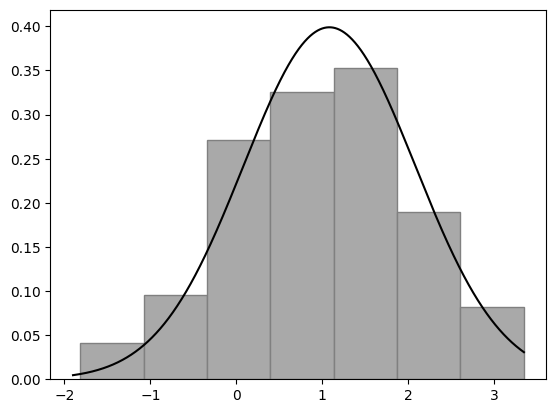

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(s_n, bins=ln, weights=np.ones_like(s_n)/(n * hn), edgecolor='grey', color='darkgrey')
x = np.arange(-1.9, 3.35, 0.001)
ax.plot(x, scipy.stats.norm.pdf(x, m[n-1], sigma[n-1][n-1]), color='black')

In [ ]:
((math.sqrt(np.std(s_1)), math.sqrt(sigma[0][0])), (np.mean(s_1), m[0]))

((1.00765074652924, 1.0), (1.9892976799931787, 2.0))

In [ ]:
((math.sqrt(np.std(s_2)), math.sqrt(sigma[1][1])), (np.mean(s_2), m[1]))

((1.0181642231393522, 1.0), (1.9519248733987098, 1.9753099120283326))

In [ ]:
((math.sqrt(np.std(s_5)), math.sqrt(sigma[4][4])), (np.mean(s_5), m[4]))

((1.0297938971504286, 1.0), (1.8376657631207574, 1.9048374180359595))

In [ ]:
((math.sqrt(np.std(s_10)), math.sqrt(sigma[9][9])), (np.mean(s_10), m[9]))

((1.0351994741387585, 1.0), (1.7927436426845071, 1.798516218759377))

In [ ]:
((math.sqrt(np.std(s_n)), math.sqrt(sigma[n-1][n-1])), (np.mean(s_n), m[n-1]))

((1.0246230013813984, 1.0), (0.9787784586893079, 1.0841629902573104))